# Python for Data Science, Week6, Mini-Project

The analysis in this notebook utilizes the World Development Indicators dataset available from Kaggle. The Kaggle dataset is a slightly transformed version of the raw data made available by the World Bank. 

This notebook seeks to perform an exploratory analysis of the dataset, in particular it explores the relationship between GDP per capita and Life Expectanty in order to answer the question; 'Is a higher GDP associated with a higher life expectancy?'.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Importing the Dataset

In [2]:
# Show working directory
#
!pwd; ls

/Users/Richard/Documents/EDX/UCSanDiegoX Course/1.Python for Data Science/Week 6
Copy of DSE 200X_ Mini Project Presentation Template.pptx
Country.csv
DSE 200X_ Mini Project Presentation_RCOX.pptx
Indicators.csv
Mini-Project Description.pdf
Rubric for Assessment of Presentation.pdf
Wk6_Mini-Project.ipynb
Wk6_Mini-Project_Final.ipynb
Wk6_Mini-Project_Final_rev1.ipynb
Wk6_Mini-Project_rev1.ipynb
Wk6_Mini-Project_rev2.ipynb
Wk6_Mini-Project_rev3.ipynb
~$DSE 200X_ Mini Project Presentation_RCOX.pptx


In [3]:
# Show heading for country.csv
!head -n1 ../Week\ 5/Exercises/worldbank/country.csv

CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,NationalAccountsBaseYear,NationalAccountsReferenceYear,SnaPriceValuation,LendingCategory,OtherGroups,SystemOfNationalAccounts,AlternativeConversionFactor,PppSurveyYear,BalanceOfPaymentsManualInUse,ExternalDebtReportingStatus,SystemOfTrade,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData


In [4]:
# Show head for Indicators.csv
!head Indicators.csv

CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
Arab World,ARB,"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,1960,133.56090740552298
Arab World,ARB,Age dependency ratio (% of working-age population),SP.POP.DPND,1960,87.7976011532547
Arab World,ARB,"Age dependency ratio, old (% of working-age population)",SP.POP.DPND.OL,1960,6.634579191565161
Arab World,ARB,"Age dependency ratio, young (% of working-age population)",SP.POP.DPND.YG,1960,81.02332950839141
Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3000000.0
Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,538000000.0
Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,47.697888095096395
Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,59563.9892169935
Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.6439635478877049


In [5]:
# Read Indicators.csv into Pandas
filename = 'Indicators.csv'

raw_data = pd.read_csv(filename, sep=',')

raw_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [6]:
# Read Country.csv into Pandas
countries = pd.read_csv('country.csv')

countries.head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,NaN,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010.0,2013.0,2001.0
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,...,NaN,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


In [7]:
# Merge Region and IncomeGroup from Countries into raw_data dataframe
#
raw_data = raw_data.merge(countries[['CountryCode','Region','IncomeGroup']], on='CountryCode', how='inner')

raw_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,Region,IncomeGroup
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02,NaN,NaN
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01,NaN,NaN
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00,NaN,NaN
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01,NaN,NaN
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06,NaN,NaN


## Cleaning the Dataset

In [8]:
# Create checkpoint by copying dataset
data = raw_data.copy()

In [9]:
# Show datatypes
data.dtypes

CountryName       object
CountryCode       object
IndicatorName     object
IndicatorCode     object
Year               int64
Value            float64
Region            object
IncomeGroup       object
dtype: object

In [10]:
# Explore Columns
#
# IndicatorName code and IndicatorCode
print(f"IndicatorCode has {len(data['IndicatorCode'].unique())} unique indicators")
print(f"IndicatorName has {len(data['IndicatorName'].unique())} unique indicators")

print(f"\nCountryName has {len(data['CountryName'].unique())} unique countries")
print(f"CountryCode has {len(data['CountryCode'].unique())} unique countries")

print(f"\nThere are {len(data['IncomeGroup'].value_counts())} unique categorys of Income shown below:")
print(data['IncomeGroup'].value_counts())

print(f"\nThere are {len(data['Region'].value_counts())} unique Regions shown below:")
print(data['Region'].value_counts())

IndicatorCode has 1344 unique indicators
IndicatorName has 1344 unique indicators

CountryName has 247 unique countries
CountryCode has 247 unique countries

There are 5 unique categorys of Income shown below:
Lower middle income     1379485
Upper middle income     1366602
Low income               824680
High income: OECD        762874
High income: nonOECD     592693
Name: IncomeGroup, dtype: int64

There are 7 unique Regions shown below:
Sub-Saharan Africa            1340193
Europe & Central Asia         1113747
Latin America & Caribbean      969259
East Asia & Pacific            703768
Middle East & North Africa     509574
South Asia                     231970
North America                   57823
Name: Region, dtype: int64


In [11]:
# We can assume that the IndicatorCode is simply another representation of the IndicatorNames and adds no additional
# information. We will therefore drop IndicatorCode but keep the CountryName and CountryCode.
#
del data['IndicatorCode']

In [12]:
# Check for null values
#
data.isnull().any()

CountryName      False
CountryCode      False
IndicatorName    False
Year             False
Value            False
Region            True
IncomeGroup       True
dtype: bool

In [13]:
# Show number of null rows for IncomeGroup
data['IncomeGroup'].isnull().sum()

730124

In [14]:
# Show number of null rows for Region
data['Region'].isnull().sum()

730124

In [15]:
# This data represents 13% of the dataset and will be dropped for consistency
data.dropna(inplace=True)

In [16]:
# Rearrange Columns
data = data[['CountryName', 'CountryCode', 'Region', 'IncomeGroup', 'IndicatorName', 'Year', 'Value']]
data.head()

,CountryName,CountryCode,Region,IncomeGroup,IndicatorName,Year,Value
730124,Afghanistan,AFG,South Asia,Low income,"Adolescent fertility rate (births per 1,000 wo...",1960,1.453210e+02
730125,Afghanistan,AFG,South Asia,Low income,Age dependency ratio (% of working-age populat...,1960,8.171773e+01
730126,Afghanistan,AFG,South Asia,Low income,"Age dependency ratio, old (% of working-age po...",1960,5.086254e+00
730127,Afghanistan,AFG,South Asia,Low income,"Age dependency ratio, young (% of working-age ...",1960,7.663147e+01
730128,Afghanistan,AFG,South Asia,Low income,Arms imports (SIPRI trend indicator values),1960,4.000000e+07


#### The Dataset contains no null values and had been reduced to only the features we are interested in. Continue with initial data exploration.

## Initial Data Exploration

In [17]:
# Perform descriptive statistics on dataset
#
data.describe(include='all')

,CountryName,CountryCode,Region,IncomeGroup,IndicatorName,Year,Value
count,4926334,4926334,4926334,4926334,4926334,4.926334e+06,4.926334e+06
unique,214,214,7,5,1344,NaN,NaN
top,Mexico,MEX,Sub-Saharan Africa,Lower middle income,"Population, total",NaN,NaN
freq,37244,37244,1340193,1379485,11669,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.994595e+03,1.179674e+12
std,NaN,NaN,NaN,NaN,NaN,1.383523e+01,5.187772e+13
min,NaN,NaN,NaN,NaN,NaN,1.960000e+03,-9.824821e+15
25%,NaN,NaN,NaN,NaN,NaN,1.985000e+03,5.048286e+00
50%,NaN,NaN,NaN,NaN,NaN,1.997000e+03,6.368985e+01
75%,NaN,NaN,NaN,NaN,NaN,2.006000e+03,1.088948e+07


#### The above table reveals the following: 
1. Dataset contains data over the years 1960 - 2015
2. Mexico has the most data entries in the dataset
3. The region with the most data across this dataset is Sub-Saharan Africa
4. 'Population, total' is the most commonly available indicator
5. The income group with the most entries in this dataset is Lower middle income.

In [18]:
data.head()

,CountryName,CountryCode,Region,IncomeGroup,IndicatorName,Year,Value
730124,Afghanistan,AFG,South Asia,Low income,"Adolescent fertility rate (births per 1,000 wo...",1960,1.453210e+02
730125,Afghanistan,AFG,South Asia,Low income,Age dependency ratio (% of working-age populat...,1960,8.171773e+01
730126,Afghanistan,AFG,South Asia,Low income,"Age dependency ratio, old (% of working-age po...",1960,5.086254e+00
730127,Afghanistan,AFG,South Asia,Low income,"Age dependency ratio, young (% of working-age ...",1960,7.663147e+01
730128,Afghanistan,AFG,South Asia,Low income,Arms imports (SIPRI trend indicator values),1960,4.000000e+07


In [19]:
# Examine count of countries grouped by Income Group and Region
#
countries[['CountryCode','Region','IncomeGroup']].groupby(['IncomeGroup','Region']).count()

CountryCode
IncomeGroup          Region                                 
High income: OECD    East Asia & Pacific                   4
                     Europe & Central Asia                24
                     Latin America & Caribbean             1
                     Middle East & North Africa            1
                     North America                         2
High income: nonOECD East Asia & Pacific                   8
                     Europe & Central Asia                13
                     Latin America & Caribbean            16
                     Middle East & North Africa            7
                     North America                         1
                     Sub-Saharan Africa                    2
Low income           East Asia & Pacific                   2
                     Latin America & Caribbean             1
                     South Asia                            2
                     Sub-Saharan Africa                   26
Lower middle income  East Asia & Pacific                  12
                     Europe & Central Asia                 8
                     Latin America & Caribbean             6
                     Middle East & North Africa            6
                     South Asia                            5
                     Sub-Saharan Africa                   14
Upper middle income  East Asia & Pacific                  10
                     Europe & Central Asia                12
                     Latin America & Caribbean            17
                     Middle East & North Africa            7
                     South Asia                            1
                     Sub-Saharan Africa                    6

#### Above table shows the highest count of countries per region and income group as follows:
1. High income: OECD concentrated in Europe @ Central Asia
2. High income: nonOECD concentrated in Latin America & Caribbean
3. Upper middle income: concentrated in Latin America & Caribbean
4. Lower middle income: concentrated in East Asia & Pacific
5. Low income: concentrated in Sub-Saharan Africa

### Generate List of Countries within each Income Grouping shown above

In [20]:
groups = data[['CountryCode','Region','IncomeGroup']].groupby(['IncomeGroup','Region'])

In [21]:
# Extract Countries from Low Income + Sub-Saharan Africa
#
LoIncomeList = groups.get_group(('Low income','Sub-Saharan Africa', ))['CountryCode'].tolist()

In [22]:
# Extract Countries from Lower Middle Income + East Asia & Pacific
#
LoMidIncomeList = groups.get_group(('Lower middle income','East Asia & Pacific', ))['CountryCode'].tolist()

In [23]:
# Extract Countries from Upper Middle Income + Latin America & Caribbean
#
UpMidIncomeList = groups.get_group(('Upper middle income','Latin America & Caribbean', ))['CountryCode'].tolist()

In [24]:
# Extract Countries from High Income: nonOECD + Latin America & Caribbean
#
HiIncomeList = groups.get_group(('High income: nonOECD','Latin America & Caribbean', ))['CountryCode'].tolist()

In [25]:
# Extract Countries from High Income + Europe & Central Asia group
#
HiIncomeOecdList = groups.get_group(('High income: OECD','Europe & Central Asia', ))['CountryCode'].tolist()

### Explore Indicatators for analysis

In [26]:
# Show all 1344 Unique Identifiers
#
# --Un-comment the following lines to show full list--
#for name in data["IndicatorName"].unique():
#    print(name)

In [27]:
# Show health related indicators
#
data.IndicatorName[data.IndicatorName.str.contains('Health', case=False)].unique()

array(['Births attended by skilled health staff (% of total)',
       'External resources for health (% of total expenditure on health)',
       'Health expenditure per capita (current US$)',
       'Health expenditure per capita, PPP (constant 2011 international $)',
       'Health expenditure, private (% of GDP)',
       'Health expenditure, public (% of GDP)',
       'Health expenditure, public (% of government expenditure)',
       'Health expenditure, public (% of total health expenditure)',
       'Health expenditure, total (% of GDP)',
       'Out-of-pocket health expenditure (% of private expenditure on health)',
       'Out-of-pocket health expenditure (% of total expenditure on health)',
       'ARI treatment (% of children under 5 taken to a health provider)',
       'Community health workers (per 1,000 people)'], dtype=object)

In [28]:
# Show GDP related indicators
#
data.IndicatorName[data.IndicatorName.str.contains('GDP')].unique()

array(['Exports of goods and services (% of GDP)',
       'External balance on goods and services (% of GDP)',
       'Final consumption expenditure, etc. (% of GDP)',
       'GDP (current LCU)', 'GDP at market prices (current US$)',
       'GDP per capita (current LCU)', 'GDP per capita (current US$)',
       'Gross capital formation (% of GDP)',
       'Gross domestic savings (% of GDP)',
       'Gross national expenditure (% of GDP)',
       'Imports of goods and services (% of GDP)',
       'Merchandise trade (% of GDP)', 'Trade (% of GDP)',
       'Coal rents (% of GDP)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Forest rents (% of GDP)', 'Mineral rents (% of GDP)',
       'Natural gas rents (% of GDP)', 'Oil rents (% of GDP)',
       'Total natural resources rents (% of GDP)',
       'Government expenditure on education as % of GDP (%)',
       'Agriculture, value added (% of GDP)',
       'CO2 emissions (kg per 2005 US$ of GDP)',
       'CO2 emissions (

In [29]:
data.IndicatorName[data.IndicatorName.str.contains('GDP per capita', case=False)].unique()

array(['GDP per capita (current LCU)', 'GDP per capita (current US$)',
       'GDP per capita (constant 2005 US$)',
       'GDP per capita (constant LCU)',
       'GDP per capita, PPP (constant 2011 international $)',
       'GDP per capita, PPP (current international $)',
       'GDP per capita growth (annual %)',
       'Government expenditure per primary student as % of GDP per capita (%)',
       'Government expenditure per secondary student as % of GDP per capita (%)',
       'Government expenditure per tertiary student as % of GDP per capita (%)'],
      dtype=object)

In [30]:
# Show life expectancy related indicators
#
data.IndicatorName[data.IndicatorName.str.contains('expectancy')].unique()

array(['Life expectancy at birth, female (years)',
       'Life expectancy at birth, male (years)',
       'Life expectancy at birth, total (years)'], dtype=object)

### For this analysis we have selected the following specific indicators : 
1. GDP per capita (current US$) 
2. Life expectancy at birth, total (years)

## Explore Selected Indicators by Year and Country

### Define function to create dataframe containing selected indicators for all countries in a given year and generate a plot for visual inspection

In [31]:
def world_gdp_vs_life(year):
    '''
    This function takes the year as input, then returns a new dataframe for the given year
    with GDP per capita and Life Expectancy values for all countries for which the data is available. 
    A Plot is also produced to visualize the relationship on linear and log scales for GDP
    '''
    # Extract GDP Columns
    worldgdp = data[(data['Year']==year) & (data['IndicatorName']=='GDP per capita (current US$)')]
    worldgdp = worldgdp.drop(['IndicatorName', 'Year'],axis=1).rename(columns={'Value':'GDP'})
    
    
    # Extract Life Expectancy Columns
    worldlife = data[(data['Year']==year) & (data['IndicatorName']=='Life expectancy at birth, total (years)')]
    worldlife = worldlife[['CountryCode', 'Value']].rename(columns={'Value':'Life Expectancy'})
    
    # Merge dataframes & drop nulls
    merged = worldgdp.merge(worldlife, on='CountryCode', how='inner').dropna()
    
    # Compute correlation coefficient
    corr = np.corrcoef(np.log(merged['GDP']), merged['Life Expectancy'])[0,1]
    
    # Visualize Results
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
    
    # Group countries by income group to assign colours accordingly
    colors={'Low income':'red','Lower middle income':'blue','Upper middle income':'green','High income: nonOECD':'orange','High income: OECD':'purple'}
    grouped = merged.groupby('IncomeGroup')
    
    # Linear Subplot
    for key, group in grouped:
        axes[0].scatter(x=group['GDP'], y=group['Life Expectancy'], label=key, s=30, alpha=0.55, c=group['IncomeGroup'].map(colors))
    axes[0].set_xlabel('GDP per capita (current US$)', fontsize=14)
    axes[0].axis([0,50000, 20, 100])
    axes[0].set_ylabel('Life Expectancy in years', fontsize=14)
    axes[0].set_title(f'GDP vs Life Expectancy for {year}: Linear Scale', fontsize=16)
    axes[0].grid(True)
    axes[0].legend(loc='upper right')
    
    # Log Subplot
    for key, group in grouped:
        axes[1].scatter(x=group['GDP'], y=group['Life Expectancy'], label=key, s=30, alpha=0.55, c=group['IncomeGroup'].map(colors))
    axes[1].set_xlabel('GDP per capita (current US$)', fontsize=14)
    axes[1].set_xscale('log')
    axes[1].grid(True, which='minor', axis='x', linewidth=0.35)
    axes[1].set_ylim(20,100)
    axes[1].set_ylabel('Life Expectancy in years', fontsize=14)
    axes[1].annotate('Correlation Coefficient: {:.2f}'.format(corr), xy=(.7,.10), xycoords='figure fraction', fontsize=15)
    axes[1].set_title(f'GDP vs Life Expectancy for {year}: Logarithmic Scale', fontsize=16)
    axes[1].grid(True)
    axes[1].legend(loc='upper right')
    
    plt.show()
    
    # Return merged dataframe
    return merged

In [32]:
# Explore chart for 1960
#global1960=world_gdp_vs_life(1960)

### Define function to create dataframe containing selected indicators for a given countries for all years and generate a plot _(optional)_ for visual inspection.

In [33]:
def gdp_vs_life(country, plot=True):
    '''
    This function takes as an argument a CountryCode, extracts GDP and Life Expectancy data
    for that country only then returns dataframe. 
    A plot is also produced showing the relationship across all available years.
    '''
    # Run check that supplied code is in list of country codes
    if country in data.CountryCode.unique():
        # Extract gdp data for country
        gdp=data[(data.IndicatorName=='GDP per capita (current US$)') & (data.CountryCode==country)]
        gdp = gdp.drop(['IndicatorName'], axis=1)
        gdp = gdp.rename(columns={'Value':'GDP'})
               
        # Extract life expectancy data for country
        life=data[(data.IndicatorName=='Life expectancy at birth, total (years)') & (data.CountryCode==country)].loc[:,'Year':]
        life.rename(columns={'Value':'Life Expectancy'}, inplace=True)
        
        # Merge dataframes & drop nulls
        merged = gdp.merge(life, on='Year', how='inner').dropna(axis=0)
        
        if plot:
            # Produce Plots of GDP vs Life Expectancy
            # First subplot: Scatter Plot
            fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
            axes[0].scatter(merged['GDP'], merged['Life Expectancy'], color='blue')
            axes[0].set_title(f'GDP vs Life Expectancy over Time: {merged.CountryName[0]} {merged.Year.min()}-{merged.Year.max()}', fontsize=15)
            axes[0].set_xlabel('GDP per capita (current US$)', fontsize=14)
            axes[0].set_ylabel('Life Expectancy', fontsize=14)
            axes[0].grid(True)


            # Second subplot: Line Plots
            axes[1].plot(merged.Year, merged.GDP, 'r--')
            axes[1].set_xlabel('Years', fontsize=14)
            axes[1].set_ylabel('GDP per capita (current US$)', color='red', fontsize=14)
            axes[1].tick_params(axis='y', labelcolor='red')
            axes[1].grid(True)

            axes2=axes[1].twinx()
            axes2.plot(merged.Year, merged.iloc[:,-1], 'b-')
            axes2.set_ylabel('Life Expectancy', color='blue', fontsize=14)
            axes2.tick_params(axis='y', labelcolor='blue')
            axes2.grid(True, which='both', linewidth=0.35, axis='y')
         
            axes[1].set_title(f'GDP and Life Expectancy vs Time: {merged.CountryName[0]} {merged.Year.min()}-{merged.Year.max()}', fontsize=15)
            plt.show()
       
        # Return results
        return merged          
    else:
        print(f'{country} is not in country codes. Try another country')
        return None

In [34]:
# Explore chart for Trinidad & Tobago
#tto = gdp_vs_life('TTO')

### Define function to Extract Random Countries, one from each Income Group _(to avoid bias)_ then plots the GDP distribution for visual inspection.

In [35]:
def generate_countries():
    '''
    This function returns a list of 5 randomly picked countries, one from each Income Group and across 4 different Regions
    for analysis. Each pick is guaranteed to have at least 44 record pairs (GDP & Life Expectency).
    A Box Plot is also generated to visually confirm the difference in GDP for the 5 picks.
    '''
    # Instantiate empty output list
    samples=[] 
    # Create boxdf with Year column only
    boxdf=pd.DataFrame({'Year': np.arange(1960,2016)}) 
    # Create list of Lists of countries from which to choose
    IncGroups=[LoIncomeList, LoMidIncomeList, UpMidIncomeList, HiIncomeList, HiIncomeOecdList] 
    # Iterate through country groupings
    for pick in IncGroups:
        # Randomly select country & ensure that it has data for at least 44 years
        temp=0
        while temp < 44:
            sample = random.sample(pick,1)[0]
            df=gdp_vs_life(sample, plot=False)
            temp=df.shape[0]
        
        # Update samples list with new country
        samples.append(sample)
        
        # Merge GDP information to boxdf dataframe & Rename Column to CountryCode
        boxdf=boxdf.merge(df[['Year','GDP']], on='Year', how='inner')
        boxdf.rename(columns={'GDP':str(sample)}, inplace=True)
        
    # Generate Box Plot of GDP values
    fix, ax = plt.subplots(figsize=(15,10))
    ax=sns.boxplot(data=boxdf.iloc[:,1:])
    ax.set_title('GDP per capita comparison across selected Countries', fontsize=16)
    ax.set_ylabel('GDP per capita (current US$)', fontsize=14)
    # Extract Country Names for tick labels using list comprehension
    ax.set_xticklabels([x for x in [data[data['CountryCode']==x]['CountryName'].iloc[0] for x in samples]])
    
    # Return list of 5 picks, one from each group
    return samples   

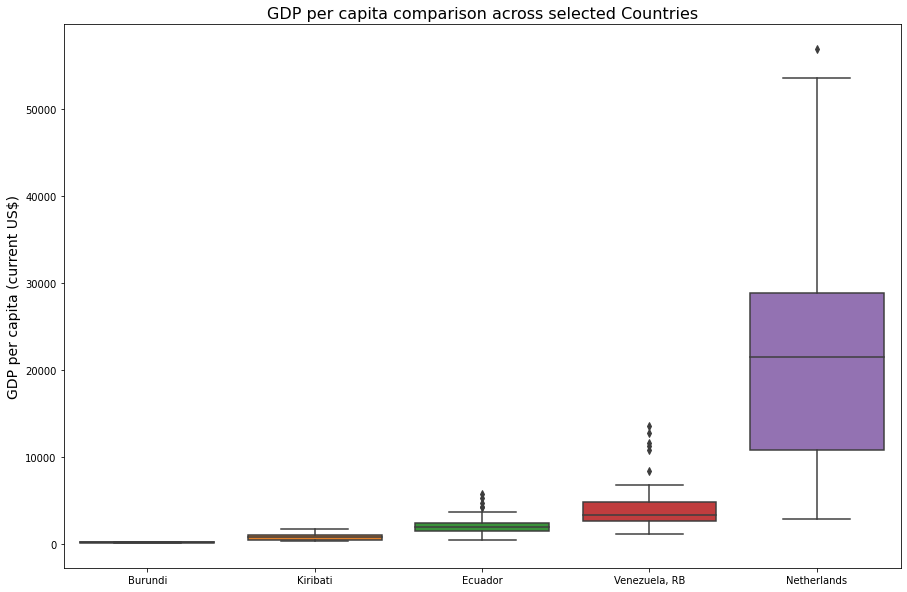

In [36]:
# Generate list of countries
#
Countries = generate_countries()

#### The aove box plot shows minimal overlapping in the dictribution of GDP values for the selected Countries confirming distinct grouping.

## Display GDP vs Life Expectancy History for each selected Country

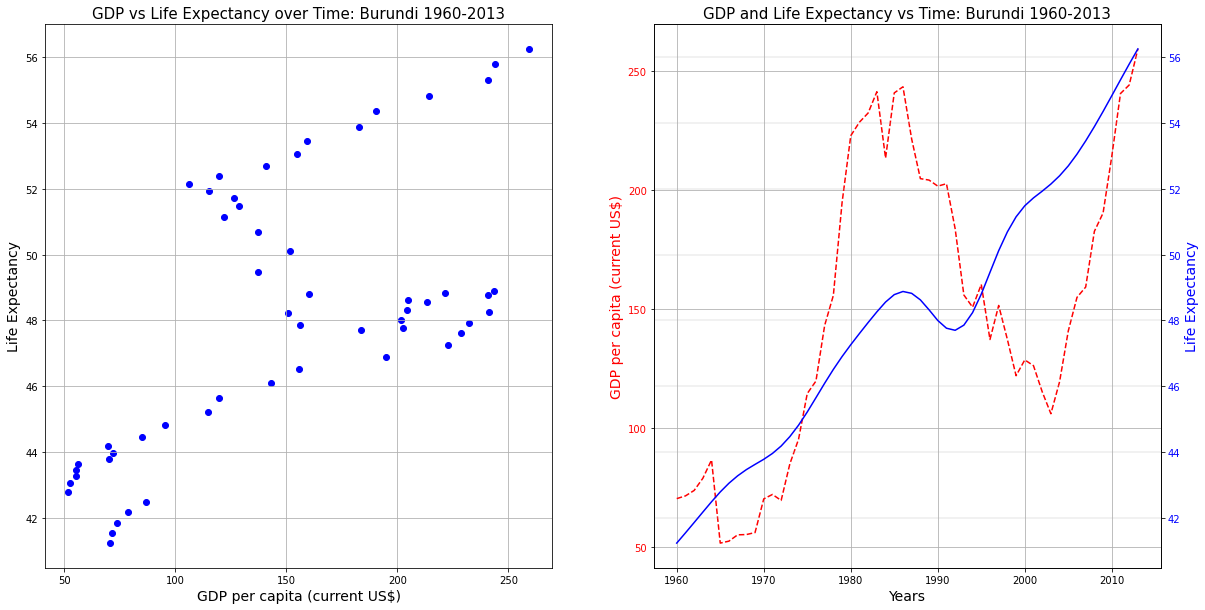

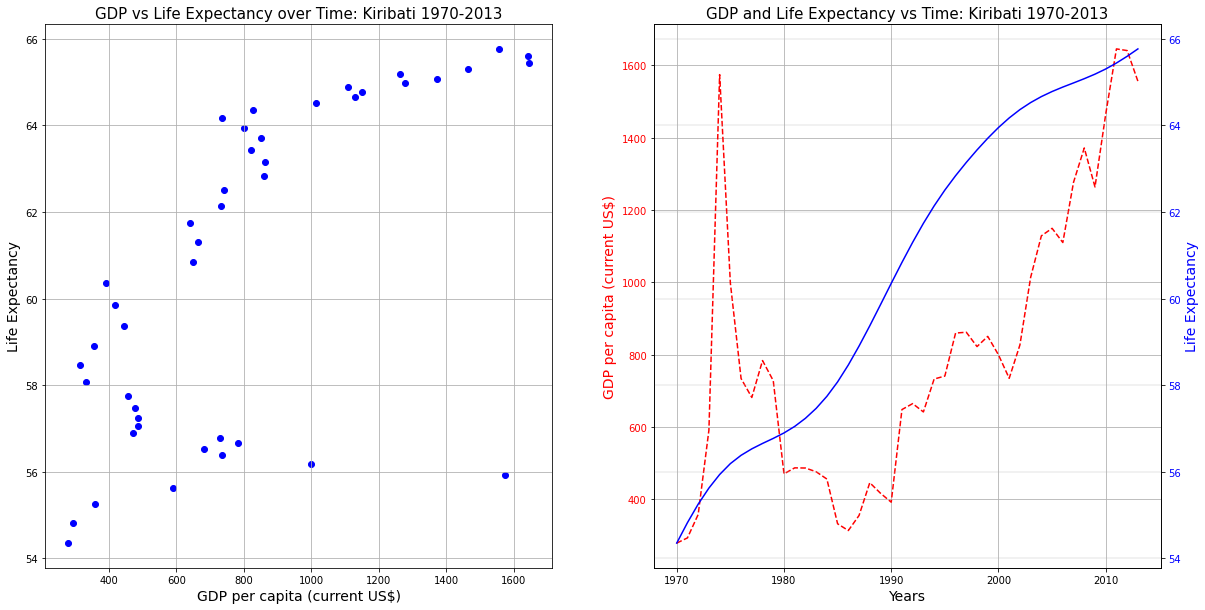

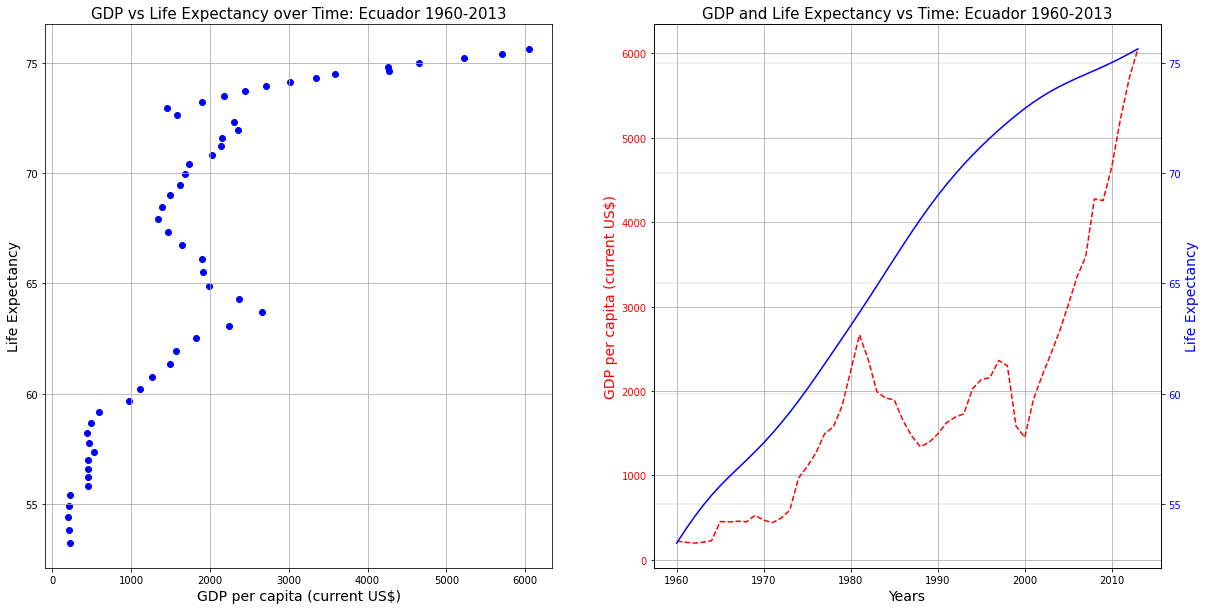

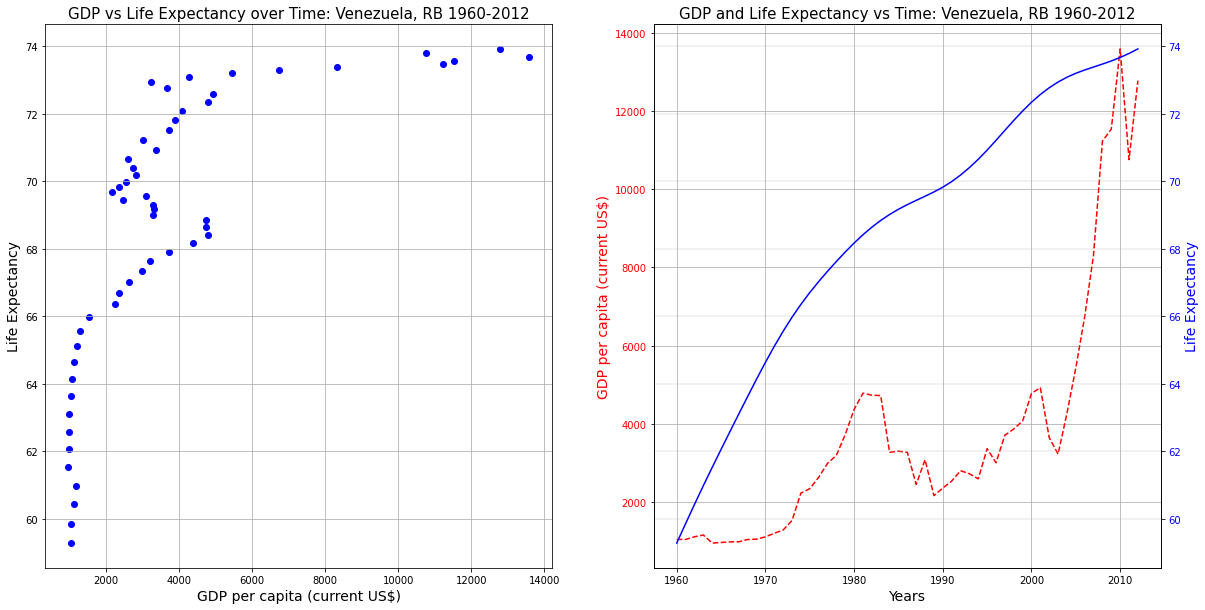

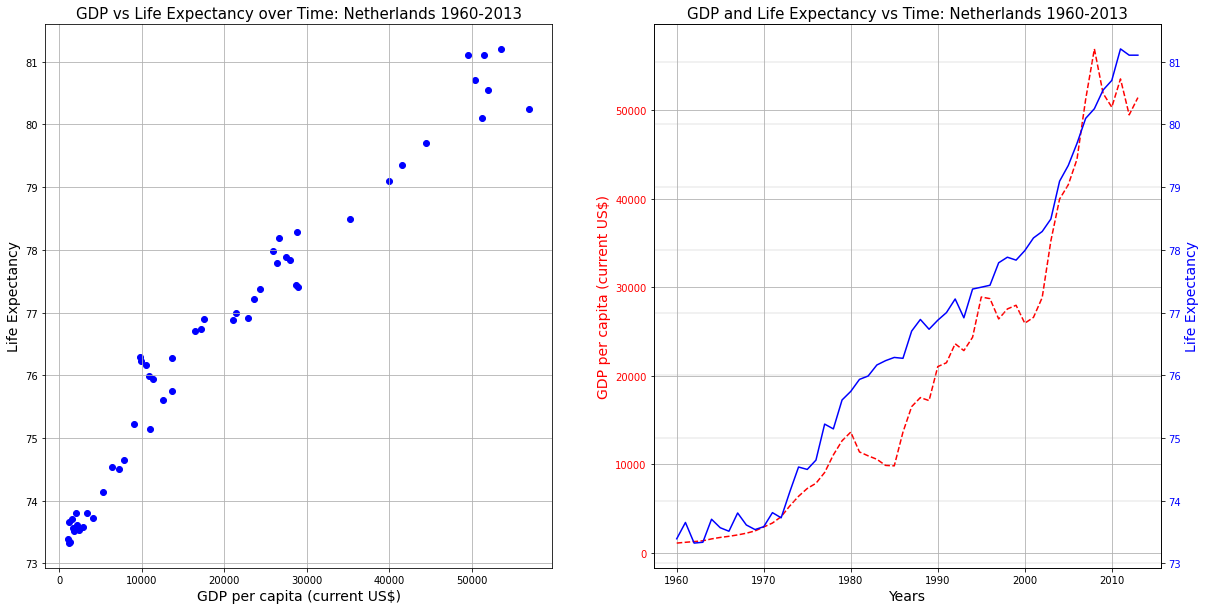

In [37]:
# Show graphics for each country
#
# Loop over gdp_vs_life() function for each Country
for country in Countries:
    temp = gdp_vs_life(country)

## Display GDP vs Life Expectancy for all Countries at each decade from 1960 - 2010

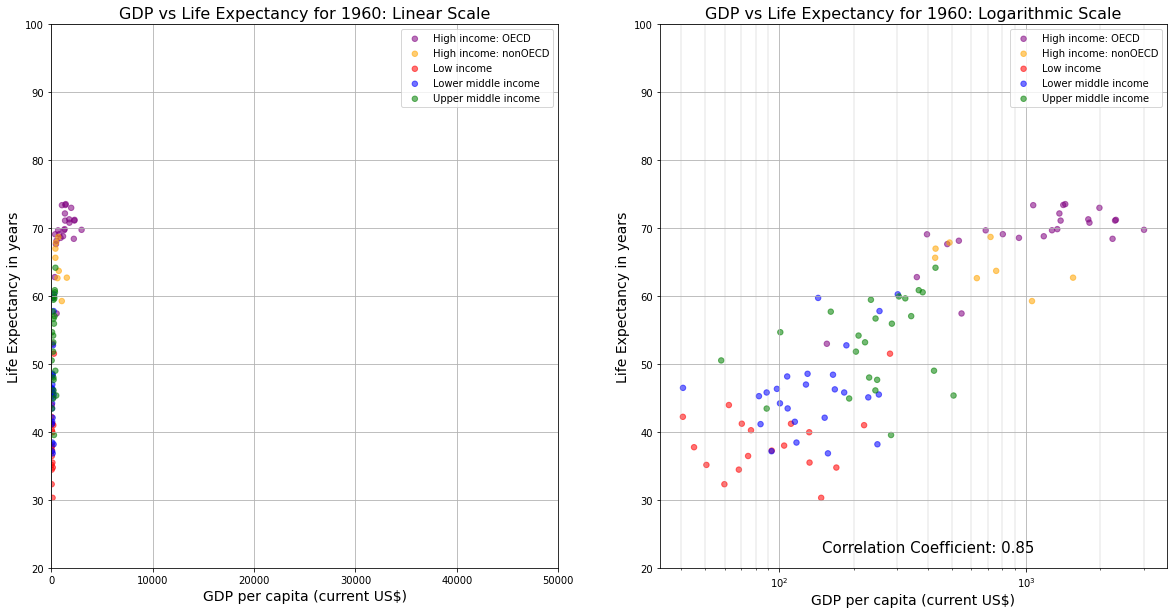

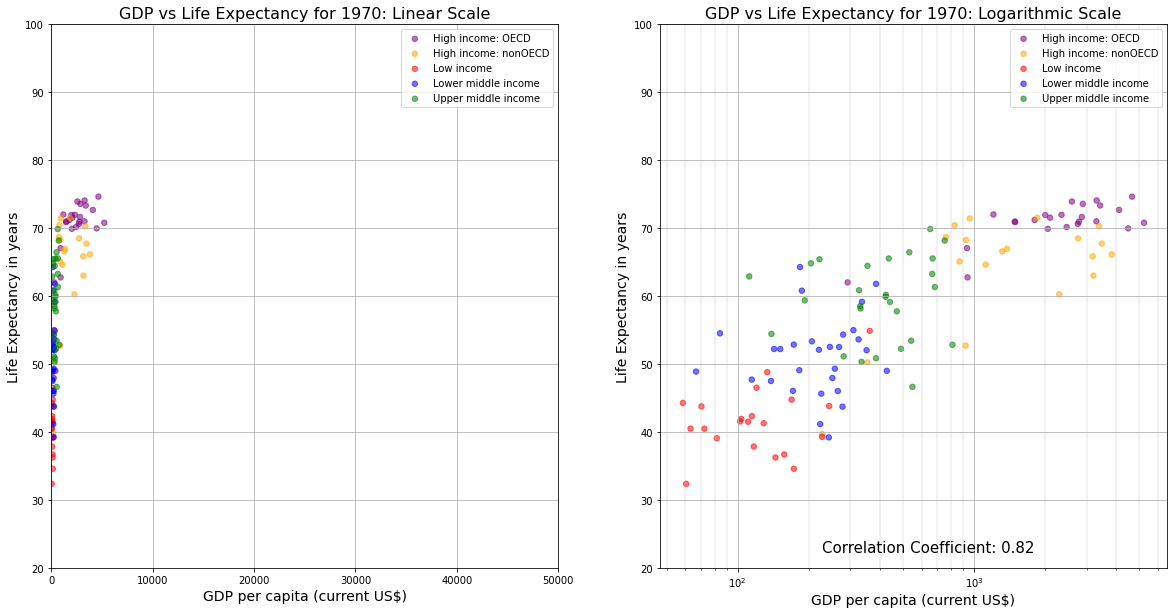

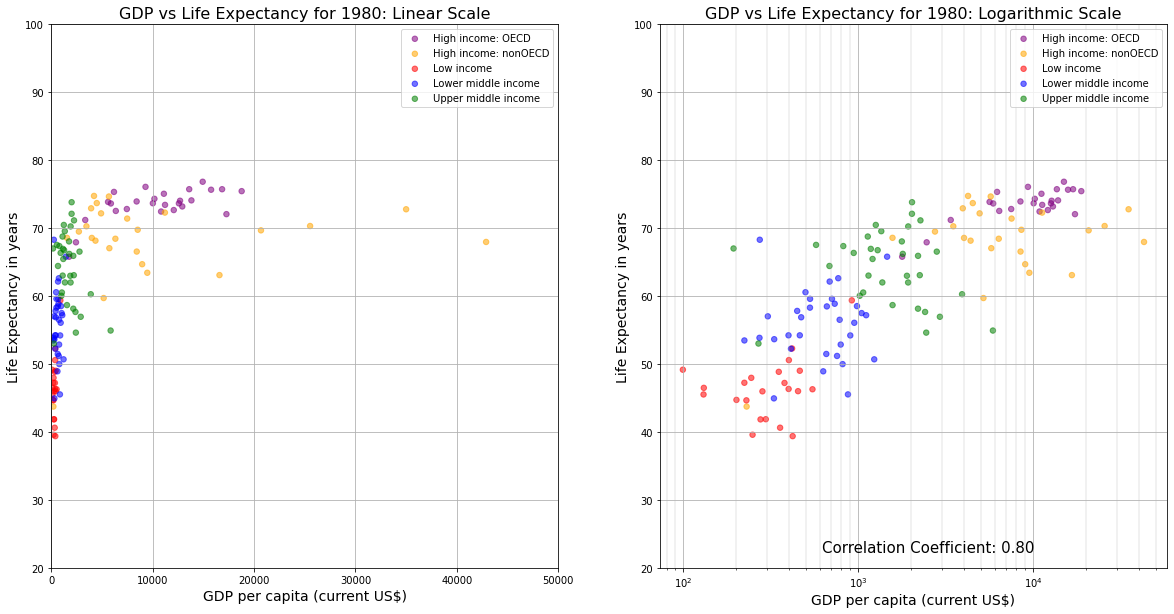

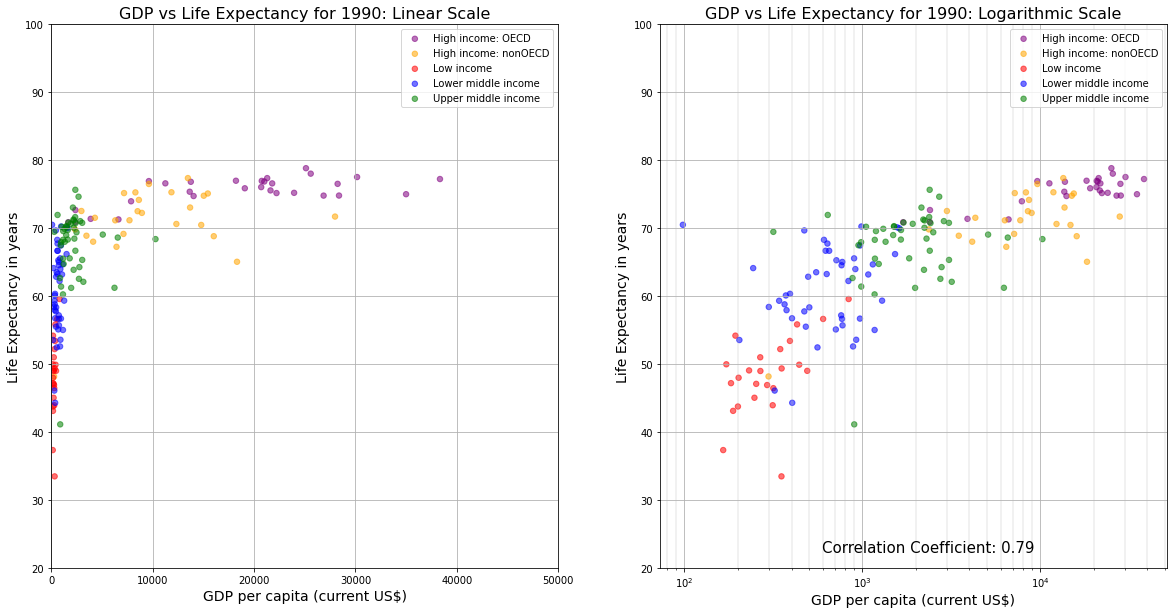

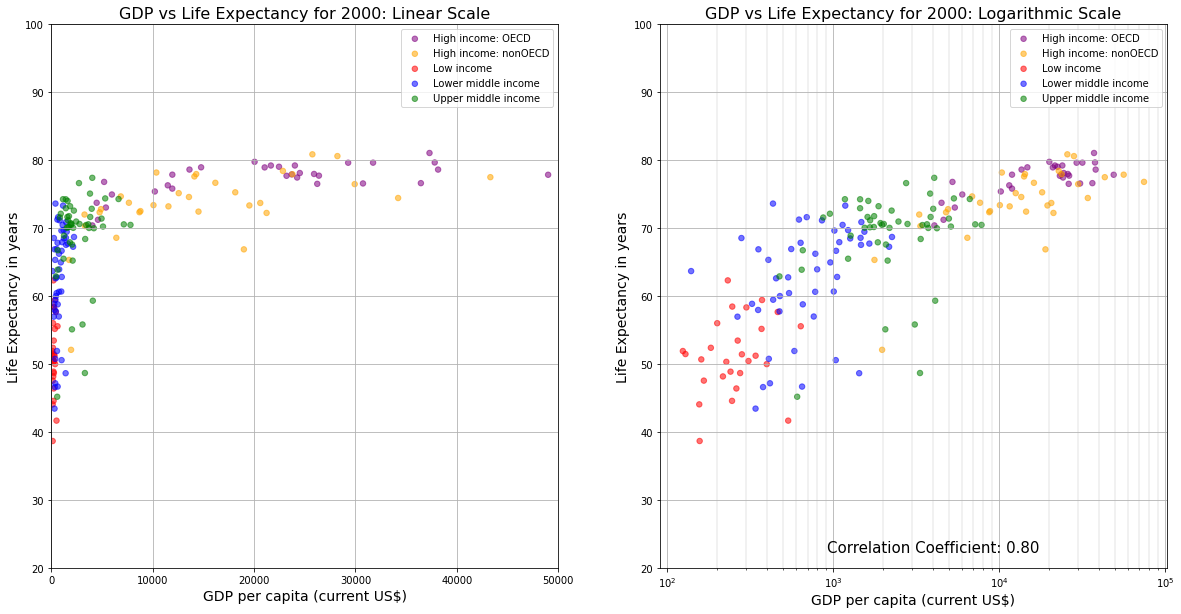

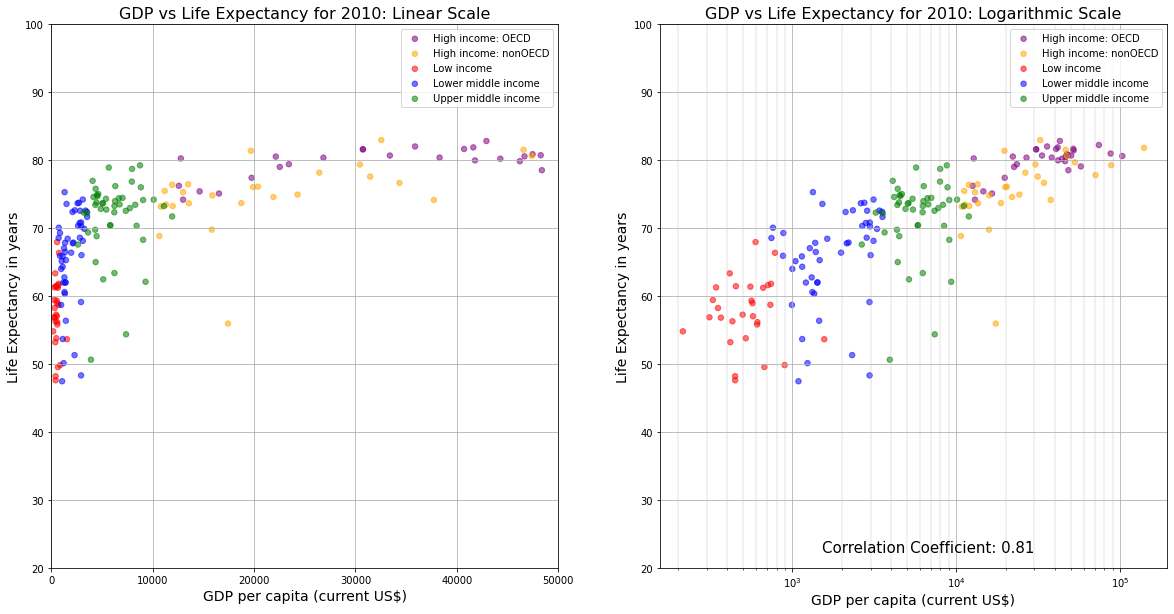

In [38]:
# Loop over world_gdp_vs_life() function for each year
for year in np.arange(1960,2013,10):
    temp = world_gdp_vs_life(year)

In [1]:
nbconvert?

Object `nbconvert` not found.
